# 20124602 assignment08

# https://githhub.com/antivec/assignment08

# import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# read mnist datas for file

In [2]:
file_data_train = "mnist_train.csv"
file_data_test  = "mnist_test.csv"

h_data_train    = open(file_data_train, "r")
h_data_test     = open(file_data_test, "r")

data_train      = h_data_train.readlines()
data_test       = h_data_test.readlines()

h_data_train.close()
h_data_test.close()

In [3]:
size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_train   = len(data_train)   # number of training images
num_test    = len(data_test)    # number of testing images

# normalize the values of the input data to be [0, 1]

In [4]:
def normalize(data):
    data_normalized = (data - min(data)) / (max(data) - min(data))
    return(data_normalized)

# example of distance function between two vectors x and y

In [5]:
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)
    return(s)

# make a matrix each column of which represents an images in a vector form 

In [6]:
list_image_train    = np.empty((size_row * size_col, num_train), dtype=float)
list_label_train    = np.empty(num_train, dtype=int)

list_image_test     = np.empty((size_row * size_col, num_test), dtype=float)
list_label_test     = np.empty(num_test, dtype=int)


# save mnist training data in the list

In [7]:
count = 0

for line in data_train:
    
    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_train[count]     = label
    list_image_train[:, count]  = im_vector    

    count += 1


In [8]:
count = 0

for line in data_test:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_test[count]      = label
    list_image_test[:, count]   = im_vector    

    count += 1



In [9]:
im_average  = np.zeros((size_row * size_col, 10), dtype=float)
im_count    = np.zeros(10, dtype=int)

In [10]:
for i in range(num_train):
    im_average[:, list_label_train[i]] += list_image_train[:, i]
    im_count[list_label_train[i]] += 1

In [11]:
f4 = plt.figure(4)
im_test_average  = np.zeros((size_row * size_col, 10), dtype=float)
im_test_count    = np.zeros(10, dtype=int)

<Figure size 432x288 with 0 Axes>

In [12]:
for i in range(num_test):
    im_test_average[:, list_label_test[i]] += list_image_test[:, i]
    im_test_count[list_label_test[i]] += 1

# bi-partitioning function



In [13]:
list_positive_image_test    = np.empty((size_row * size_col, num_train), dtype=float)
list_positive_label_test    = np.empty(num_train, dtype=int)

list_negative_image_test    = np.empty((size_row * size_col, num_train), dtype=float)
list_negative_label_test    = np.empty(num_train, dtype=int)

positive_party = 0
negative_party = 0

for i in range(num_test):
    if(list_label_test[i] == 0):
        list_positive_label_test[positive_party]     = list_label_test[i] 
        list_positive_image_test[:,positive_party]  = list_image_test[:,i]        
        positive_party +=1
    else:
        list_negative_label_test[negative_party]     = list_label_test[i]
        list_negative_image_test[:, negative_party]  = list_image_test[:,i]   
        negative_party +=1



# Classifier 
\begin{equation*}
\hat{f(x)}  = sign(\tilde{f(x)})
\begin{cases}
    +1       & \quad \text{if }  \text{ x } \geq \text{0} \\
    -1       & \quad \text{if }  \text{ x < 0}
  \end{cases}
\end{equation*}

# expected non-0 turned out to be non-0 -> TN
#   (-) & (-)

# expected 0 turned out to be 0 -> TP
#   (+) & (+)

# expected 0 turned out to be non-0 -> FP
#   (+) & (-)

# expected non-0 turned out to be 0 -> FN
#   (-) & (+)

# plot positive-class mnist of first 150 images

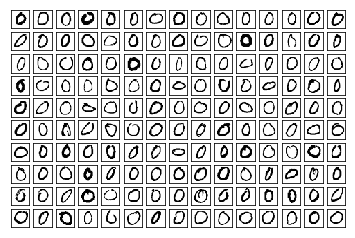

In [14]:
for i in range(150):
    positive_label       = list_positive_label_test[i]
    positive_im_vector   = list_positive_image_test[:, i]
    positive_im_matrix   = positive_im_vector.reshape((size_row, size_col))

    plt.subplot(10, 15, i+1)
   # plt.title(positive_label)
    plt.imshow(positive_im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

# let model parameter 
\begin{equation*}
\theta = \frac{1}{x^i_{train avg}} (i = label)
\end{equation*}

\begin{equation*}
\hat{f(x;\theta)}  = \theta_{1}f_{1}(x) + ... +\theta_{784}f_{784}(x)
\end{equation*}

# Plot 150 positive-class images that shows after applying the classifier

C:\Users\webber\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


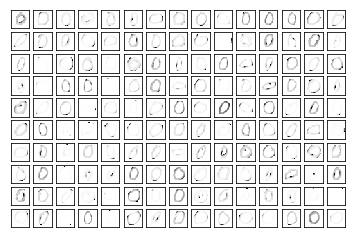

In [15]:
for i in range(150):
    positive_label       = list_positive_label_test[i]
    positive_im_vector   = np.nan_to_num(list_positive_image_test[:, i] / im_average[:,0])
    positive_im_matrix   = positive_im_vector.reshape((size_row, size_col))    
    plt.subplot(10, 15, i+1)
    plt.imshow(positive_im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)  

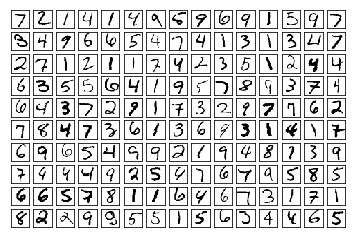

In [16]:
for i in range(150):
    n_label       = list_negative_label_test[i]
    n_im_vector   = list_negative_image_test[:, i]
    n_im_matrix   = n_im_vector.reshape((size_row, size_col))

    plt.subplot(10, 15, i+1)
   # plt.title(positive_label)
    plt.imshow(n_im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

# Plot 150 negative-class images that shows after applying the classifier

C:\Users\webber\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\webber\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\webber\Anaconda3\lib\site-packages\matplotlib\image.py:408: RuntimeWarning: overflow encountered in double_scalars
  newmin = vmid - dv * 1.e7
C:\Users\webber\Anaconda3\lib\site-packages\matplotlib\image.py:413: RuntimeWarning: overflow encountered in double_scalars
  newmax = vmid + dv * 1.e7
C:\Users\webber\Anaconda3\lib\site-packages\matplotlib\image.py:450: RuntimeWarning: invalid value encountered in multiply
  A_resampled *= ((a_max - a_min) / 0.8)
C:\Users\webber\Anaconda3\lib\site-packages\matplotlib\colors.py:504: RuntimeWarning: invalid value encountered in 

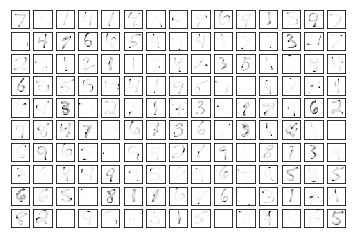

In [17]:
for i in range(150):
    negative_label       = list_negative_label_test[i]
    negative_im_vector   = np.nan_to_num(list_negative_image_test[:, i] / im_average[:,negative_label])
    negative_im_matrix   = negative_im_vector.reshape((size_row, size_col))

    plt.subplot(10, 15, i+1)
    plt.imshow(negative_im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)